N0f8[0.361N0f8 0.349N0f8 0.345N0f8; 0.361N0f8 0.361N0f8 0.361N0f8; 0.376N0f8 0.353N0f8 0.361N0f8]


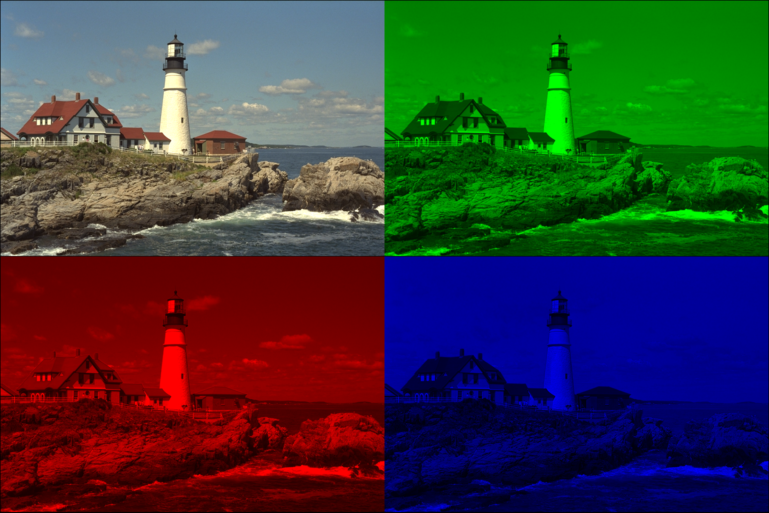

In [4]:
using Plots
using TestImages, Images
img = testimage("lighthouse")
imgarr = channelview(img)
plot(img)
println(imgarr[1,1:3,1:3])
img_red = StackedView(imgarr[1,:,:], zeroarray, zeroarray)
img2_red = colorview(RGB, img_red)
img_green = StackedView(zeroarray,imgarr[2,:,:], zeroarray)
img2_green = colorview(RGB, img_green)
img_blue = StackedView(zeroarray, zeroarray,imgarr[3,:,:])
img2_blue = colorview(RGB, img_blue)
#permutedims(imgarr, [2,3,1])
mosaicview(img,img2_red, img2_green, img2_blue; nrow = 2)


512 768
(393216, 3)
nl = 512
nc = 768
(393216, 3)
(512, 768)


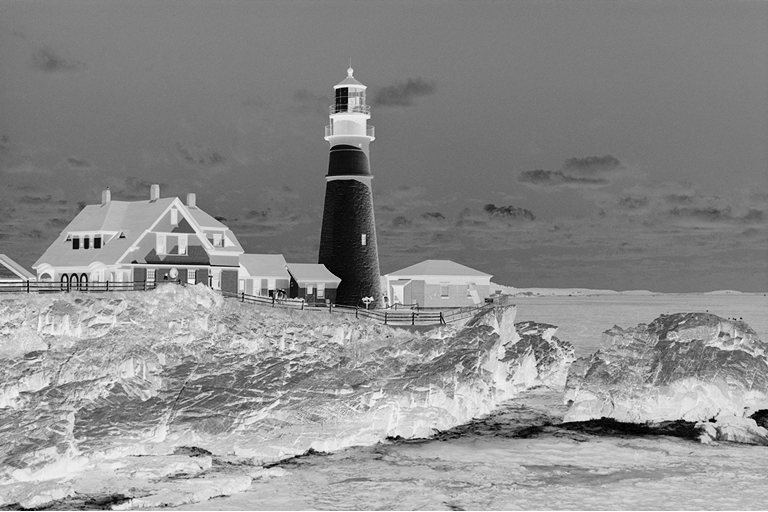

In [5]:

X1=imgarr[1,:,:];X2=imgarr[2,:,:];X3=imgarr[3,:,:];
nl,nc=size(X1);
println(nl," ", nc)
#
# X is the matrix for the PCA
X=[X1[:] X2[:] X3[:]];
println(size(X))
using LinearAlgebra, Statistics
function my_PCA(X::Matrix{<:Real};normed=false)::Tuple{Vector{<:Real},Matrix{<:Real},Matrix{<:Real},Matrix{<:Real},Real,Vector{<:Real}}
"""
    Compute the PCA of Data
    Input
    X : (n,p) Matrix of reals
         n = number of observations
         p = number of variables
    Output
        Λ : Vector of the p eigen value in decrease order
        U : (p,p) Matrix of reals
            eigen vectors in column
        Ψ : (n,p) Matrix of reals
            Coordinates of the observation in the new basis
        Φ = (p,p) Matrix of reals
             Coordinates of the variables in the new basis
        I_total : Real
             total inertia
        cum_var_ratio : p vector of reals
             cumulative variance ratio
"""
     n,p = size(X)
     Λ = zeros(p); U = zeros(p,p); Ψ = zeros(n,p); Φ = zeros(p,p); I_total=0; cum_var_ratio = zeros(p)
     # Calculation of centered data
     xbar = mean(X,dims=1)
     Xc = X - ones(n,1)*xbar
     covMat = (1/n)*Xc'*Xc
     if normed == true
     s=std(Xc,corrected=false,dims=1)
     Y=(Xc)./(ones(n,1)*s);
     covMat=(1/n)*Y'*Y
     println("R = ", covMat)
     end


     # Computating total inertia
     I_total = tr(covMat)
     Λ, U = eigen(covMat)
     eigOrder = sortperm(Λ, rev = true) # for abtaining increase order of eigen values
     Λ = Λ[eigOrder]
     # cumulative variance ratios
     cum_var_ratio =  Vector{Float64}(undef,p)
     for i in 1:p
         cum_var_ratio[i] = sum(Λ[1:i])/I_total
     end
     U = U[:,eigOrder]
     if normed == true
       Ψ = Y*U
       Φ = U*sqrt.(diagm(Λ))
     else
       Ψ = Xc*U
       Φ = U*sqrt.(n*diagm(Λ))
     end
     return Λ, U, Ψ, Φ, I_total,cum_var_ratio
end

Λ, U, Ψ, Φ, I_total, cum_var_ratio = my_PCA(X)
println("nl = ", nl)
println("nc = ", nc)
println(size(Ψ))
Ψ1 = zeros(nl,nc)
Ψ2 = zeros(nl,nc)
Ψ3 = zeros(nl,nc)
println(size(Ψ1))
I=1:nl;
for j in 1:nc
   Ψ1[I,j] = Ψ[(j-1)*nl .+ I,1];
   Ψ2[I,j] = Ψ[(j-1)*nl .+ I,2];
   Ψ3[I,j] = Ψ[(j-1)*nl .+ I,3];
end


minΨ1=minimum(Ψ1)
maxΨ1=maximum(Ψ1)
PSI1=(Ψ1 .- minΨ1) ./ (maxΨ1-minΨ1)

using Colors
Gray.(PSI1)
#@view PSI1
